In [9]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('howpop_train.csv')

In [10]:
df.shape

(134137, 17)

In [11]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [12]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [14]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [15]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


In [45]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]
df['day'] = [d.day for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

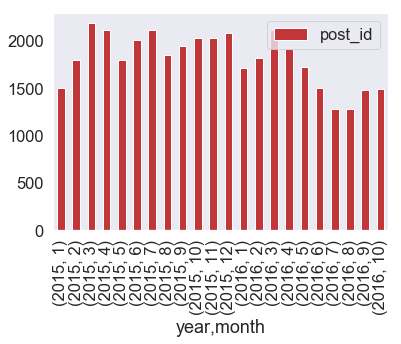

In [46]:
df[df['year'] >= 2015].groupby(['year', 'month'])[['post_id']].count().plot(kind='bar')

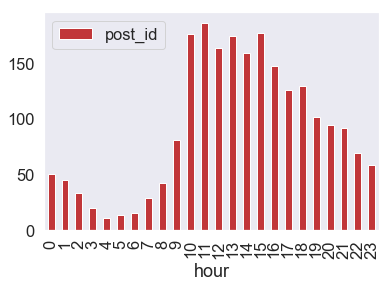

In [48]:
df[(df['year'] == 2015) & (df['month'] == 3)].groupby(['day'])[['post_id']].count().plot(kind='bar')

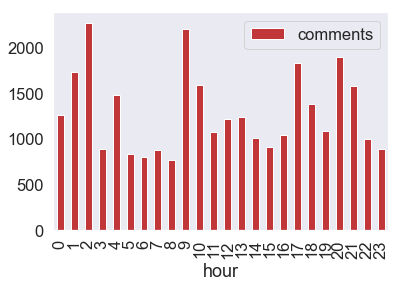

In [51]:
df.groupby(['hour'])[['comments']].max().plot(kind='bar')

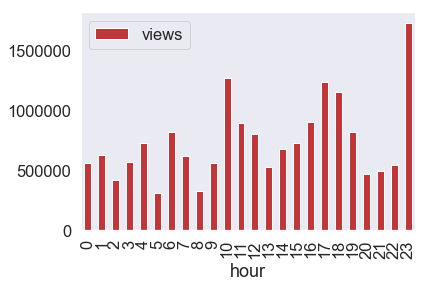

In [52]:
df.groupby(['hour'])[['views']].max().plot(kind='bar')

In [58]:
df.groupby(['author'])['votes_minus'].count().sort_values()

author
@gudoshi                  0
@ptizza                   0
@little_mouse             0
@Vertexodessa             0
@sergeantha               0
@Novoselzev               0
@whiskey                  0
@Torwald                  0
@emendz                   0
@BrainInTheBox            0
@nicothin                 0
@GMM                      0
@dreend5                  0
@amxm                     0
@pixelmixer               0
@doobrik                  0
@Selassie                 0
@Trave                    0
@Mobody                   0
@averkin                  0
@DeNix                    0
@ailarre                  0
@helios                   0
@Apocalepse               0
@cvss                     0
@ttf                      0
@MagNomeTik               0
@djvust                   0
@Doggy                    0
@alexander_moiseyev       0
                       ... 
@sashaeve               134
@ValdikSS               135
@sunnybear              142
@frekenbok              144
@Shpankov    

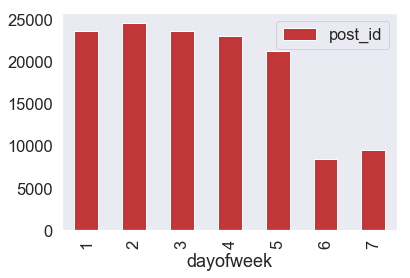

In [59]:
df.groupby(['dayofweek'])[['post_id']].count().plot(kind='bar')